In [72]:
import json
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

# get clear data

что хотим получить

для анализа качества: пресижн рекол экьюраси
* образ — ос
* для каждого образа сет из уязвимостей
    * уязвимость (сет с уязвимостями и рхса?) — пакет (сеты с пакетами) — скор — год уязвимости

* зависимость от ос? в каких ос больше уязвимостей находится
* зависимость от пакетов? в каких пакетах больше всего уязвимостей
* старые и до сих пор находятся? частота встречаемости уязвимостей, самые частые, самые старые, распределение по годам
* распределение по скору. также плотность скор — год
* анализ качества сканеров для 

* per image
* per 

In [8]:
tags = json.load(open("../tags/tags_random_amd64/tags_flat_3000.json"))
len(tags)

3207

In [9]:
scanners = ["clair", "gc", "grype", "scout", "snyk", "trivy"]

In [10]:
data = {}
for sc in scanners:
    print("reading", sc)
    with open(f"../final_results/src/{sc}_tags_vulns.json", "r") as f:
        data[sc] = json.load(f)


reading clair
reading gc
reading grype
reading scout
reading snyk
reading trivy


# отфильтровали теги

In [11]:
per_tag = []
error_tags = []

for tag in tags:
    counter = 0
    t = {"tag": tag}
    t["counter"] = sum([tag in data[s] for s in scanners])
    if sum([tag in data[s] for s in scanners]) < 5:
        error_tags.append(tag)
    per_tag.append(t)
error_tags

['vito/git-branch-heads-resource:latest',
 'zarplata/concourse-git-bitbucket-pr-resource:1.2.3',
 'zarplata/concourse-git-bitbucket-pr-resource:latest',
 'zarplata/concourse-git-bitbucket-pr-resource:1.2.4',
 'mattermost/mattermost-team-edition:1d5b47a',
 'mattermost/mattermost-team-edition:5ce0c57',
 'mprasil/bitwarden:latest',
 'kubernetes/pause:10.11.6-x86_64',
 'kubernetes/pause:10.11.4',
 'kubernetes/pause:10.11.2',
 'minio/console:v0.15.2',
 'minio/console:v0.26.1',
 'minio/console:v0.17.1',
 'lsstsqre/sciplat-lab:d_2023_07_01',
 'ackstorm/relk-filebeat:v7.2.0',
 'ackstorm/relk-filebeat:v6']

In [12]:
tags = list(set(tags) - set(error_tags))
len(tags)

3191

# reorder data

* кладём в папку джейсоны tag.json
* внутри clair ...., gc ..., и так далее

In [7]:
data.keys()

dict_keys(['clair', 'gc', 'grype', 'scout', 'snyk', 'trivy'])

In [8]:
per_tag = []

for tag in tags:
    t = {"tag": tag}
    for s in scanners:
        list_from_s = data[s].get(tag, [])
        t[s] = list_from_s
    per_tag.append(t)

In [9]:
pd.DataFrame.from_dict(per_tag)

,tag,clair,gc,grype,scout,snyk,trivy
0,splunk/k8s-metrics-aggr:1.1.12,"[{'id': 'CVE-2024-26897', 'cve_id': 'CVE-2024-...","[{'id': 'CVE-2021-3918', 'cve_id': 'CVE-2021-3...","[{'id': 'GHSA-pj73-v5mw-pm9j', 'cve_id': '', '...","[{'id': 'CVE-2020-36310', 'cve_id': 'CVE-2020-...","[{'id': 'CVE-2019-12900', 'cve_id': 'CVE-2019-...","[{'id': 'CVE-2019-12900', 'cve_id': 'CVE-2019-..."
1,sameersbn/postgresql:9.5-4,"[{'id': 'CVE-2018-20406', 'cve_id': 'CVE-2018-...","[{'id': 'CVE-2018-1000001', 'cve_id': 'CVE-201...","[{'id': 'CVE-2019-3462', 'cve_id': 'CVE-2019-3...","[{'id': 'CVE-2014-9620', 'cve_id': 'CVE-2014-9...","[{'id': 'CVE-2020-27350', 'cve_id': 'CVE-2020-...","[{'id': 'CVE-2019-3462', 'cve_id': 'CVE-2019-3..."
2,circleci/mysql:latest,"[{'id': 'CVE-2016-10228', 'cve_id': 'CVE-2016-...","[{'id': 'CVE-2022-2068', 'cve_id': 'CVE-2022-2...","[{'id': 'CVE-2011-3374', 'cve_id': 'CVE-2011-3...","[{'id': 'CVE-2023-39804', 'cve_id': 'CVE-2023-...","[{'id': 'CVE-2011-3374', 'cve_id': 'CVE-2011-3...","[{'id': 'CVE-2011-3374', 'cve_id': 'CVE-2011-3..."
3,myoung34/github-runner:2.313.0-ubuntu-bionic,"[{'id': 'CVE-2024-2961', 'cve_id': 'CVE-2024-2...","[{'id': 'CVE-2024-23652', 'cve_id': 'CVE-2024-...","[{'id': 'CVE-2024-21319', 'cve_id': 'CVE-2024-...","[{'id': 'CVE-2023-45288', 'cve_id': 'CVE-2023-...","[{'id': '', 'cve_id': '', 'sas': ['CVE-2018-12...","[{'id': 'CVE-2023-24329', 'cve_id': 'CVE-2023-..."
4,willfarrell/autoheal:1.2.0,"[{'id': 'CVE-2021-3711', 'cve_id': 'CVE-2021-3...","[{'id': 'CVE-2021-3711', 'cve_id': 'CVE-2021-3...","[{'id': 'CVE-2021-36159', 'cve_id': 'CVE-2021-...","[{'id': 'CVE-2021-22924', 'cve_id': 'CVE-2021-...","[{'id': 'CVE-2021-36159', 'cve_id': 'CVE-2021-...","[{'id': 'CVE-2021-36159', 'cve_id': 'CVE-2021-..."
...,...,...,...,...,...,...,...
3186,atlassian/confluence-server:7.18.1,"[{'id': 'CVE-2016-1000027', 'cve_id': 'CVE-201...","[{'id': 'CVE-2016-1000027', 'cve_id': 'CVE-201...","[{'id': 'CVE-2021-42771', 'cve_id': 'CVE-2021-...","[{'id': 'CVE-2022-26520', 'cve_id': 'CVE-2022-...","[{'id': 'CVE-2022-3715', 'cve_id': 'CVE-2022-3...","[{'id': 'CVE-2022-3715', 'cve_id': 'CVE-2022-3..."
3187,ratelimitpreview/test:latest,[],[],"[{'id': 'CVE-2022-48174', 'cve_id': 'CVE-2022-...",[],[],[]
3188,datadog/synthetics-private-location-worker:1.31.0,"[{'id': 'CVE-2023-45919', 'cve_id': 'CVE-2023-...","[{'id': 'CVE-2023-32314', 'cve_id': 'CVE-2023-...","[{'id': 'CVE-2011-3374', 'cve_id': 'CVE-2011-3...","[{'id': 'CVE-2023-39804', 'cve_id': 'CVE-2023-...","[{'id': 'CVE-2016-1585', 'cve_id': 'CVE-2016-1...","[{'id': 'CVE-2011-3374', 'cve_id': 'CVE-2011-3..."
3189,shyxormz/bitbucket-build-status-resource:debug,"[{'id': 'CVE-2019-1387', 'cve_id': 'CVE-2019-1...","[{'id': 'CVE-2018-19486', 'cve_id': 'CVE-2018-...","[{'id': 'CVE-2019-18276', 'cve_id': 'CVE-2019-...","[{'id': 'CVE-2019-1348', 'cve_id': 'CVE-2019-1...","[{'id': 'CVE-2019-12900', 'cve_id': 'CVE-2019-...","[{'id': 'CVE-2018-20843', 'cve_id': 'CVE-2018-..."


In [10]:
tag = "whenlambomoon/zend:latest"

# score

* true positive — сканер назвал уязвимость и другие тоже назвали
* false positive — сканер назвал уязвимость и другие не назвали
* true negative — сканер не назвал уязвимость и другие не назвали — не можем посчитать
* false negative — сканер не назвал уязвимость, а другие назвали


* плюс степень — 1 другой сканер, 2 других сканера, 3 других сканера?


* `cum[key]["cl_truepos"] = len(cum[key]["conf_by_two"] & cves["cl"][key])`
* `cum[key]["cl_falseneg"] = len(cum[key]["conf_by_two"] - cves["cl"][key])`
* `cum[key]["cl_falsepos"] = len(cves["cl"][key] - cum[key]["conf_by_two"])`

In [9]:
s_num = len(scanners)
s_other_num = s_num - 1

# проставить айди

In [10]:
def set_id(d: dict):
    for s in scanners:
        counter = 0
        for entry in d[s]:
            entry["uid"] = s + str(counter)
            counter += 1

# агрегированные записи

```json
{
    "uid": "aggr1",
    "links": [clair1, gc55]
}
```

In [11]:
def get_aggr_entry_by_link(d: dict, s: str, uid):
    for i in d["aggr"]:
        links = sum(i["links"].values(),[])
        if uid in links:
            return i["uid"]
    return None

In [12]:
def get_similar_from_scanner(entry: dict, tag_data: dict, s: str) -> str:
    s_entries = tag_data[s]
    res = []
    for s_entry in s_entries:
        for id in entry["sas"]:
            if id in s_entry["sas"]:
                res.append(s_entry["uid"])
    return res

In [13]:
def make_aggr_entries(d: dict):
    d["aggr"] = []
    counter = 0
    for s in scanners:
        for entry in d[s]:
            r = get_aggr_entry_by_link(d, s, entry["uid"])
            if r:  # есть аггр запись с этой записью из сканера
                pass
                # print(f"found {entry['uid']} in {r}")
            else:  # эта запись сканера не встречается в других
                aggr = {"uid": f"aggr{counter}"}
                links = {}
                for s in scanners:
                    similar = get_similar_from_scanner(entry, d, s)
                    similar = list(set(similar))
                    links[s] = similar
                aggr["links"] = links
                d["aggr"].append(aggr)
                counter += 1
                # print(f'{entry["uid"]} not found. created {aggr}')

# conf

In [14]:
def set_confirmed_data(d):
    for entry in d["aggr"]:
        entry["conf"] = {}
        # print(entry)
        for s in scanners:
            if entry["links"][s]:
                entry["conf"][s] = True
            else:
                entry["conf"][s] = False

        entry["conf_count"] = sum(entry["conf"].values())
        entry["conf_count_others"] = entry["conf_count"] - 1
        entry["conf_rate"] = entry["conf_count_others"] / s_other_num
        # print(entry)

# дальше работаем с агрегатными записями

# tp

для каждого сканера посчитать число тру позитив образов

сканер назвал уязвимость и другие тоже назвали

число других — хотя бы 1

In [15]:
# print

json.dump(d, open("d.json", "w"), indent=4)

NameError: name 'd' is not defined

In [16]:
others = 2

In [17]:
def set_tp(d):
    d["res"]["tp"] = {"num": {}, "data": {}}
    for s in scanners:
        d["res"]["tp"]["data"][s] = []
        d["res"]["tp"]["num"][s] = None

    for e in d["aggr"]:
        if e["conf_count_others"] >= others:
            for s in scanners:
                if e["conf"][s]:
                    d["res"]["tp"]["data"][s].append(e["uid"])

    for s in scanners:
        d["res"]["tp"]["num"][s] = len(set(d["res"]["tp"]["data"][s]))


# fp

false positive — сканер назвал уязвимость и другие не назвали

In [18]:
def set_fp(d):
    d["res"]["fp"] = {"num": {}, "data": {}}
    for s in scanners:
        d["res"]["fp"]["data"][s] = []
        d["res"]["fp"]["num"][s] = None

    for e in d["aggr"]:
        if e["conf_count_others"] < others:
            for s in scanners:
                if e["conf"][s]:
                    d["res"]["fp"]["data"][s].append(e["uid"])

    for s in scanners:
        d["res"]["fp"]["num"][s] = len(set(d["res"]["fp"]["data"][s]))


# fn

* false negative — сканер не назвал уязвимость, а другие назвали


In [19]:
def set_fn(d):
    d["res"]["fn"] = {"num": {}, "data": {}}
    for s in scanners:
        d["res"]["fn"]["data"][s] = []
        d["res"]["fn"]["num"][s] = None


    for e in d["aggr"]:
        if e["conf_count_others"] >= others:
            for s in scanners:
                if not e["conf"][s]:
                    d["res"]["fn"]["data"][s].append(e["uid"])

    for s in scanners:
        d["res"]["fn"]["num"][s] = len(set(d["res"]["fn"]["data"][s]))


# tn

* true negative — сканер не назвал уязвимость и другие не назвали


In [20]:
def set_tn(d):
    d["res"]["tn"] = {"num": {}, "data": {}}
    for s in scanners:
        d["res"]["tn"]["data"][s] = []
        d["res"]["tn"]["num"][s] = None


    for e in d["aggr"]:
        if e["conf_count_others"] < others:
            for s in scanners:
                if not e["conf"][s]:
                    d["res"]["tn"]["data"][s].append(e["uid"])

    for s in scanners:
        d["res"]["tn"]["num"][s] = len(set(d["res"]["tn"]["data"][s]))


# metrics

# precision
* tp / (tp + fp)

In [21]:
def set_precision(d):
    d["metrics"]["precision"] = {}
    for s in scanners:
        d["metrics"]["precision"][s] = None


    for s in scanners:
        tp = d["res"]["tp"]["num"][s]
        fp = d["res"]["fp"]["num"][s]
        if tp + fp == 0:
            d["metrics"]["precision"][s] = 1
        else:
            d["metrics"]["precision"][s] = tp / (tp + fp)


# recall
* tp / (tp + fn)

In [22]:
def set_recall(d):
    d["metrics"]["recall"] = {}
    for s in scanners:
        d["metrics"]["recall"][s] = None


    for s in scanners:
        tp = d["res"]["tp"]["num"][s]
        fn = d["res"]["fn"]["num"][s]
        if tp + fn == 0:
            d["metrics"]["recall"][s] = 0
        else:
            d["metrics"]["recall"][s] = tp / (tp + fn)


# accuracy
* (tp + tn) / (tp + fp + fn + tn)

In [23]:
def set_accuracy(d):
    d["metrics"]["accuracy"] = {}
    for s in scanners:
        d["metrics"]["accuracy"][s] = None


    for s in scanners:
        tp = d["res"]["tp"]["num"][s]
        fp = d["res"]["fp"]["num"][s]
        fn = d["res"]["fn"]["num"][s]
        tn = d["res"]["tn"]["num"][s]
        if tp + fp + fn + tn == 0:
            d["metrics"]["accuracy"][s] = None
        else:
            d["metrics"]["accuracy"][s] = (tp + tn) / (tp + fp + fn + tn)


# f1
* 2 * precision * recall / (precision + recall)

In [24]:
def set_f1(d):
    d["metrics"]["f1"] = {}
    for s in scanners:
        d["metrics"]["f1"][s] = None


    for s in scanners:
        precision = d["metrics"]["precision"][s]
        recall = d["metrics"]["recall"][s]
        if precision + recall == 0:
            d["metrics"]["f1"][s] = None
        else:
            d["metrics"]["f1"][s] = 2 * precision * recall / (precision + recall)


In [25]:
def process_d(d):
    set_id(d)
    make_aggr_entries(d)
    set_confirmed_data(d)

    d["res"] = {}
    set_tp(d)
    set_fp(d)
    set_fn(d)
    set_tn(d)

    d["metrics"] = {}
    set_precision(d)
    set_recall(d)
    set_accuracy(d)
    set_f1(d)

# big process

In [26]:
counter = 0
for tag in tags:
    d = next(t for t in per_tag if t["tag"] == tag)
    process_d(d)
    counter += 1
    if counter % 100 == 0:
        print(counter)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [28]:
counter = 0
for tag in tags:
    d = next(t for t in per_tag if t["tag"] == tag)
    filename = tag.replace(":", "_").replace("/", "_")
    with open(f"../final_results/per_tag_res2/{filename}.json", "w") as f:
        json.dump(d, f, indent=4)
    counter += 1
    if counter % 100 == 0:
        print(counter)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


# only numbers

In [29]:
numbers = []

In [30]:
for tag in tags:
    d = next(t for t in per_tag if t["tag"] == tag)
    res = {
        "tag": tag,
        "tp": d["res"]["tp"]["num"],
        "fp": d["res"]["fp"]["num"],
        "fn": d["res"]["fn"]["num"],
        "tn": d["res"]["tn"]["num"],
        "precision": d["metrics"]["precision"],
        "recall": d["metrics"]["recall"],
        "accuracy": d["metrics"]["accuracy"],
        "f1": d["metrics"]["f1"],
    }
    numbers.append(res)

In [31]:
numbers

[{'tag': 'shockbyte/default-server:latest',
  'tp': {'clair': 795,
   'gc': 804,
   'grype': 817,
   'scout': 686,
   'snyk': 797,
   'trivy': 813},
  'fp': {'clair': 0,
   'gc': 935,
   'grype': 22,
   'scout': 1,
   'snyk': 39,
   'trivy': 855},
  'fn': {'clair': 24,
   'gc': 15,
   'grype': 2,
   'scout': 133,
   'snyk': 22,
   'trivy': 6},
  'tn': {'clair': 977,
   'gc': 42,
   'grype': 955,
   'scout': 976,
   'snyk': 938,
   'trivy': 122},
  'precision': {'clair': 1.0,
   'gc': 0.46233467510063253,
   'grype': 0.9737783075089392,
   'scout': 0.9985443959243085,
   'snyk': 0.9533492822966507,
   'trivy': 0.48741007194244607},
  'recall': {'clair': 0.9706959706959707,
   'gc': 0.9816849816849816,
   'grype': 0.9975579975579976,
   'scout': 0.8376068376068376,
   'snyk': 0.9731379731379731,
   'trivy': 0.9926739926739927},
  'accuracy': {'clair': 0.9866369710467706,
   'gc': 0.4710467706013363,
   'grype': 0.9866369710467706,
   'scout': 0.9253897550111359,
   'snyk': 0.966035634743

In [32]:
pd.DataFrame.from_dict(numbers)

,tag,tp,fp,fn,tn,precision,recall,accuracy,f1
0,shockbyte/default-server:latest,"{'clair': 795, 'gc': 804, 'grype': 817, 'scout...","{'clair': 0, 'gc': 935, 'grype': 22, 'scout': ...","{'clair': 24, 'gc': 15, 'grype': 2, 'scout': 1...","{'clair': 977, 'gc': 42, 'grype': 955, 'scout'...","{'clair': 1.0, 'gc': 0.46233467510063253, 'gry...","{'clair': 0.9706959706959707, 'gc': 0.98168498...","{'clair': 0.9866369710467706, 'gc': 0.47104677...","{'clair': 0.9851301115241635, 'gc': 0.62861610..."
1,rancher/gitjob:v0.1.57,"{'clair': 0, 'gc': 16, 'grype': 16, 'scout': 1...","{'clair': 0, 'gc': 5, 'grype': 55, 'scout': 8,...","{'clair': 16, 'gc': 0, 'grype': 0, 'scout': 0,...","{'clair': 59, 'gc': 54, 'grype': 4, 'scout': 5...","{'clair': 1, 'gc': 0.7619047619047619, 'grype'...","{'clair': 0.0, 'gc': 1.0, 'grype': 1.0, 'scout...","{'clair': 0.7866666666666666, 'gc': 0.93333333...","{'clair': 0.0, 'gc': 0.8648648648648648, 'gryp..."
2,sonarsoftware/customerportal:9320a217d1654858a...,"{'clair': 283, 'gc': 272, 'grype': 283, 'scout...","{'clair': 43, 'gc': 7, 'grype': 7, 'scout': 4,...","{'clair': 0, 'gc': 11, 'grype': 0, 'scout': 0,...","{'clair': 16, 'gc': 52, 'grype': 52, 'scout': ...","{'clair': 0.8680981595092024, 'gc': 0.97491039...","{'clair': 1.0, 'gc': 0.9611307420494699, 'gryp...","{'clair': 0.8742690058479532, 'gc': 0.94736842...","{'clair': 0.9293924466338259, 'gc': 0.96797153..."
3,prom/mysqld-exporter:v0.15.0-rc.0,"{'clair': 0, 'gc': 15, 'grype': 15, 'scout': 1...","{'clair': 0, 'gc': 5, 'grype': 10, 'scout': 7,...","{'clair': 15, 'gc': 0, 'grype': 0, 'scout': 0,...","{'clair': 12, 'gc': 7, 'grype': 2, 'scout': 5,...","{'clair': 1, 'gc': 0.75, 'grype': 0.6, 'scout'...","{'clair': 0.0, 'gc': 1.0, 'grype': 1.0, 'scout...","{'clair': 0.4444444444444444, 'gc': 0.81481481...","{'clair': 0.0, 'gc': 0.8571428571428571, 'gryp..."
4,armory/front50:2.24.12,"{'clair': 149, 'gc': 149, 'grype': 145, 'scout...","{'clair': 0, 'gc': 0, 'grype': 80, 'scout': 18...","{'clair': 0, 'gc': 0, 'grype': 4, 'scout': 4, ...","{'clair': 107, 'gc': 107, 'grype': 27, 'scout'...","{'clair': 1.0, 'gc': 1.0, 'grype': 0.644444444...","{'clair': 1.0, 'gc': 1.0, 'grype': 0.973154362...","{'clair': 1.0, 'gc': 1.0, 'grype': 0.671875, '...","{'clair': 1.0, 'gc': 1.0, 'grype': 0.775401069..."
...,...,...,...,...,...,...,...,...,...
3186,nsqio/nsq:v1.3.0,"{'clair': 4, 'gc': 4, 'grype': 4, 'scout': 4, ...","{'clair': 0, 'gc': 0, 'grype': 10, 'scout': 6,...","{'clair': 0, 'gc': 0, 'grype': 0, 'scout': 0, ...","{'clair': 10, 'gc': 10, 'grype': 0, 'scout': 4...","{'clair': 1.0, 'gc': 1.0, 'grype': 0.285714285...","{'clair': 1.0, 'gc': 1.0, 'grype': 1.0, 'scout...","{'clair': 1.0, 'gc': 1.0, 'grype': 0.285714285...","{'clair': 1.0, 'gc': 1.0, 'grype': 0.444444444..."
3187,photoprism/photoprism:230615,"{'clair': 0, 'gc': 256, 'grype': 128, 'scout':...","{'clair': 0, 'gc': 29, 'grype': 41, 'scout': 8...","{'clair': 256, 'gc': 0, 'grype': 128, 'scout':...","{'clair': 72, 'gc': 43, 'grype': 31, 'scout': ...","{'clair': 1, 'gc': 0.8982456140350877, 'grype'...","{'clair': 0.0, 'gc': 1.0, 'grype': 0.5, 'scout...","{'clair': 0.21951219512195122, 'gc': 0.9115853...","{'clair': 0.0, 'gc': 0.9463955637707948, 'gryp..."
3188,oznu/homebridge:ubuntu-no-avahi-amd64,"{'clair': 312, 'gc': 725, 'grype': 344, 'scout...","{'clair': 78, 'gc': 16, 'grype': 21, 'scout': ...","{'clair': 441, 'gc': 28, 'grype': 409, 'scout'...","{'clair': 93, 'gc': 155, 'grype': 150, 'scout'...","{'clair': 0.8, 'gc': 0.9784075573549258, 'gryp...","{'clair': 0.41434262948207173, 'gc': 0.9628154...","{'clair': 0.4383116883116883, 'gc': 0.95238095...","{'clair': 0.5459317585301837, 'gc': 0.97054886..."
3189,apicurio/apicurio-studio-auth:14.0.0,"{'clair': 335, 'gc': 343, 'grype': 336, 'scout...","{'clair': 2, 'gc': 1, 'grype': 5, 'scout': 33,...","{'clair': 11, 'gc': 3, 'grype': 10, 'scout': 9...","{'clair': 55, 'gc': 56, 'grype': 52, 'scout': ...","{'clair': 0.9940652818991098, 'gc': 0.99709302...","{'clair': 0.

# numbers 2

In [13]:
per_tag = []
for tag in tags:
    filename = tag.replace(":", "_").replace("/", "_")
    with open(f"../final_results/per_tag_res2/{filename}.json", "r") as f:
        per_tag.append(json.load(f))

In [14]:
numbers2 = {
    "tp": [],
    "fp": [],
    "fn": [],
    "tn": [],
    "precision": [],
    "recall": [],
    "accuracy": [],
    "f1": []
}

In [15]:
for key in ["tp", "fp", "fn", "tn"]:
    res = []
    for tag in tags:
        r = {"tag": tag}
        d = next(t for t in per_tag if t["tag"] == tag)
        for s in scanners:
            r[s] = d["res"][key]["num"][s]
        res.append(r)
    numbers2[key] = res

In [16]:
for key in ["precision", "recall", "accuracy", "f1"]:
    res = []
    for tag in tags:
        r = {"tag": tag}
        d = next(t for t in per_tag if t["tag"] == tag)
        for s in scanners:
            r[s] = d["metrics"][key][s]
        res.append(r)
    numbers2[key] = res

In [18]:
pd.DataFrame.from_dict(numbers2["tp"])

,tag,clair,gc,grype,scout,snyk,trivy
0,linuxserver/couchpotato:amd64-7260c12f-ls81,0,0,0,0,0,0
1,datadog/docker-dd-agent:12.7.5322-dogstatsd-al...,93,94,93,94,87,94
2,jitsi/prosody:unstable-2022-11-11,316,369,369,257,316,318
3,ceph/daemon:master-39ffd2f-mimic-centos-7,0,793,935,205,920,925
4,bobrik/curator:5.8.1,18,18,18,18,0,17
...,...,...,...,...,...,...,...
3186,kbudde/rabbitmq-exporter:1.0.0-RC15,0,36,36,36,0,1
3187,kindest/node:v1.28.0,139,161,161,81,134,155
3188,unplugged/jira-comment-resource:1.7,6,87,87,87,47,70
3189,koenkk/zigbee2mqtt:latest,6,6,6,6,6,6


In [19]:
precision = pd.DataFrame.from_dict(numbers2["precision"])#.to_clipboard(excel=True)
precision

,tag,clair,gc,grype,scout,snyk,trivy
0,linuxserver/couchpotato:amd64-7260c12f-ls81,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
1,datadog/docker-dd-agent:12.7.5322-dogstatsd-al...,0.920792,0.989474,0.553571,0.949495,0.925532,0.989474
2,jitsi/prosody:unstable-2022-11-11,1.000000,0.971053,0.948586,0.941392,1.000000,1.000000
3,ceph/daemon:master-39ffd2f-mimic-centos-7,1.000000,1.000000,0.969917,0.949074,0.991379,0.981953
4,bobrik/curator:5.8.1,0.750000,0.947368,0.169811,0.857143,1.000000,1.000000
...,...,...,...,...,...,...,...
3186,kbudde/rabbitmq-exporter:1.0.0-RC15,1.000000,0.857143,0.642857,0.705882,1.000000,1.000000
3187,kindest/node:v1.28.0,0.992857,0.969880,0.930636,0.900000,0.978102,1.000000
3188,unplugged/jira-comment-resource:1.7,1.000000,1.000000,0.554140,0.988636,1.000000,1.000000
3189,koenkk/zigbee2mqtt:latest,1.000000,1.000000,0.545455,1.000000,1.000000,1.000000


In [27]:
precision = precision[scanners].mean().reset_index(name="precision")
precision

,index,precision
0,clair,0.914443
1,gc,0.900447
2,grype,0.676017
3,scout,0.888489
4,snyk,0.953906
5,trivy,0.923113


In [28]:
recall = pd.DataFrame.from_dict(numbers2["recall"])#.to_clipboard(excel=True)
recall

,tag,clair,gc,grype,scout,snyk,trivy
0,linuxserver/couchpotato:amd64-7260c12f-ls81,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,datadog/docker-dd-agent:12.7.5322-dogstatsd-al...,0.989362,1.000000,0.989362,1.000000,0.925532,1.000000
2,jitsi/prosody:unstable-2022-11-11,0.856369,1.000000,1.000000,0.696477,0.856369,0.861789
3,ceph/daemon:master-39ffd2f-mimic-centos-7,0.000000,0.844515,0.995740,0.218317,0.979766,0.985091
4,bobrik/curator:5.8.1,1.000000,1.000000,1.000000,1.000000,0.000000,0.944444
...,...,...,...,...,...,...,...
3186,kbudde/rabbitmq-exporter:1.0.0-RC15,0.000000,1.000000,1.000000,1.000000,0.000000,0.027778
3187,kindest/node:v1.28.0,0.863354,1.000000,1.000000,0.503106,0.832298,0.962733
3188,unplugged/jira-comment-resource:1.7,0.068966,1.000000,1.000000,1.000000,0.540230,0.804598
3189,koenkk/zigbee2mqtt:latest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
recall = recall[scanners].mean().reset_index(name="recall")
recall

,index,recall
0,clair,0.576055
1,gc,0.880391
2,grype,0.892386
3,scout,0.748996
4,snyk,0.693586
5,trivy,0.756561


In [30]:
accuracy = pd.DataFrame.from_dict(numbers2["accuracy"])#.to_clipboard(excel=True)
accuracy = accuracy[scanners].mean().reset_index(name="accuracy")
accuracy

,index,accuracy
0,clair,0.734513
1,gc,0.889809
2,grype,0.678781
3,scout,0.792820
4,snyk,0.837875
5,trivy,0.833855


In [31]:
f1 = pd.DataFrame.from_dict(numbers2["f1"])#.to_clipboard(excel=True)
f1 = f1[scanners].mean().reset_index(name="f1")
f1

,index,f1
0,clair,0.614589
1,gc,0.846455
2,grype,0.749356
3,scout,0.750311
4,snyk,0.732445
5,trivy,0.778522


In [94]:
results = pd.merge(precision, recall).merge(accuracy).merge(f1)
results = results.round(2)
results.drop("accuracy", axis=1).to_clipboard(excel=True)
results

,index,precision,recall,accuracy,f1
0,clair,0.91,0.58,0.73,0.61
1,gc,0.90,0.88,0.89,0.85
2,grype,0.68,0.89,0.68,0.75
3,scout,0.89,0.75,0.79,0.75
4,snyk,0.95,0.69,0.84,0.73
5,trivy,0.92,0.76,0.83,0.78


In [84]:
pngpath = "/Users/shadrunov/private/thesis/final/assets/images/{}.png"

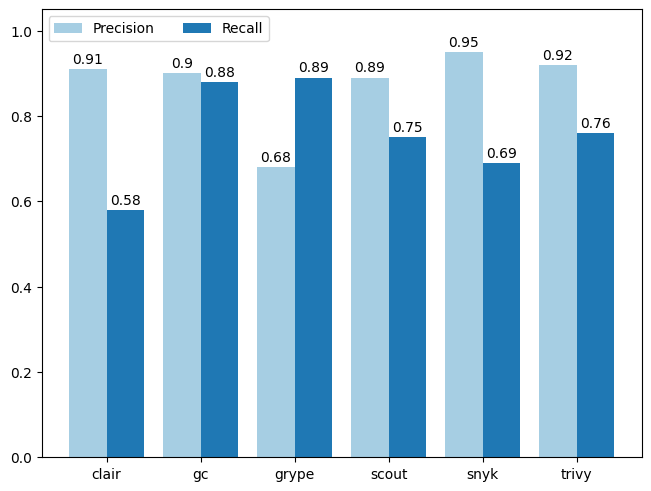

In [95]:
scanners = results["index"]
values = {
    'Precision': results["precision"],
    'Recall': results["recall"],
}

# colors = ["tab:green", "tab:blue"]
colors = plt.get_cmap("Paired")

x = np.arange(len(scanners))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
# fig.set_size_inches(8, 6)

for attribute, measurement in values.items():
    offset = width * multiplier + 0.5 * width
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors(multiplier))
    ax.bar_label(rects, padding=2)
    multiplier += 1

ax.set_xticks(x + width, scanners)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.05)

plt.savefig(pngpath.format("precisionrecall2"), bbox_inches='tight', dpi=600)
plt.show()

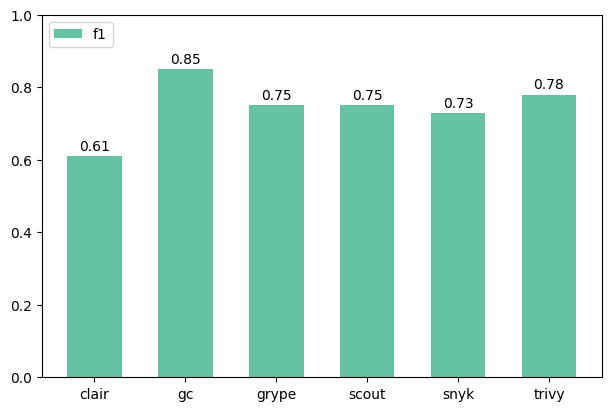

In [96]:
scanners = results["index"]
values = {
    'f1': results["f1"],
}

# colors = ["tab:green", "tab:blue"]
colors = plt.get_cmap("Set2")

x = np.arange(len(scanners))  # the label locations
width = 0.6  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(6, 4)

for attribute, measurement in values.items():
    offset = width * multiplier + 1 * width
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors(multiplier))
    ax.bar_label(rects, padding=2)
    multiplier += 1

ax.set_xticks(x + width, scanners)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.0)

plt.savefig(pngpath.format("f12"), bbox_inches='tight', dpi=600)
plt.show()